In [1]:
# Socio-Clinical Depression Assessment System — Exploratory Data Analysis (EDA)

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Plot style
sns.set(style="whitegrid", palette="viridis", font_scale=1.1)

print("✅ Libraries loaded for EDA!")


✅ Libraries loaded for EDA!


In [2]:
BASE_DIR = os.path.abspath("..")
DATA_PROCESSED = os.path.join(BASE_DIR, "data", "processed")
data_path = os.path.join(DATA_PROCESSED, "mhp_cleaned.csv")

df = pd.read_csv(data_path)
print(f"✅ Dataset loaded successfully! Shape: {df.shape}")

df.head()


✅ Dataset loaded successfully! Shape: (2028, 39)


,Age,Gender,University,Department,Academic_Year,Current_CGPA,waiver_or_scholarship,PSS1,PSS2,PSS3,...,PHQ2,PHQ3,PHQ4,PHQ5,PHQ6,PHQ7,PHQ8,PHQ9,Depression_Value,Depression_Label
0,18-22,0,8,2,3,2.50 - 2.99,0,3,4,3,...,2,3,2,2,2,2,3,2,20,5
1,18-22,1,8,2,4,3.00 - 3.39,0,3,3,4,...,2,2,2,2,2,2,2,2,19,3
2,18-22,1,0,2,4,3.00 - 3.39,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,18-22,1,0,2,4,3.00 - 3.39,0,3,1,2,...,1,2,1,2,1,2,2,1,14,2
4,18-22,1,10,2,3,2.50 - 2.99,0,4,4,4,...,3,3,3,1,3,0,3,3,20,5


In [3]:
print("\n--- Dataset Info ---")
df.info()

print("\n--- Summary Statistics ---")
df.describe().T



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2028 entries, 0 to 2027
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    2028 non-null   object
 1   Gender                 2028 non-null   int64 
 2   University             2028 non-null   int64 
 3   Department             2028 non-null   int64 
 4   Academic_Year          2028 non-null   int64 
 5   Current_CGPA           2028 non-null   object
 6   waiver_or_scholarship  2028 non-null   int64 
 7   PSS1                   2028 non-null   int64 
 8   PSS2                   2028 non-null   int64 
 9   PSS3                   2028 non-null   int64 
 10  PSS4                   2028 non-null   int64 
 11  PSS5                   2028 non-null   int64 
 12  PSS6                   2028 non-null   int64 
 13  PSS7                   2028 non-null   int64 
 14  PSS8                   2028 non-null   int64 
 15 

,count,mean,std,min,25%,50%,75%,max
Gender,2028.0,0.702663,0.467865,0.0,0.0,1.0,1.0,2.0
University,2028.0,5.712525,3.862805,0.0,1.0,7.0,8.0,14.0
Department,2028.0,2.535996,1.943247,0.0,2.0,2.0,2.0,11.0
Academic_Year,2028.0,1.959073,1.642072,0.0,0.0,2.0,4.0,4.0
waiver_or_scholarship,2028.0,0.210059,0.407451,0.0,0.0,0.0,0.0,1.0
PSS1,2028.0,2.350099,1.178962,0.0,2.0,2.0,3.0,4.0
PSS2,2028.0,2.326923,1.156746,0.0,2.0,2.0,3.0,4.0
PSS3,2028.0,2.708087,1.132379,0.0,2.0,3.0,4.0,4.0
PSS4,2028.0,2.369329,1.222703,0.0,2.0,2.0,3.0,4.0
PSS5,2028.0,2.173077,1.084549,0.0,2.0,2.0,3.0,4.0


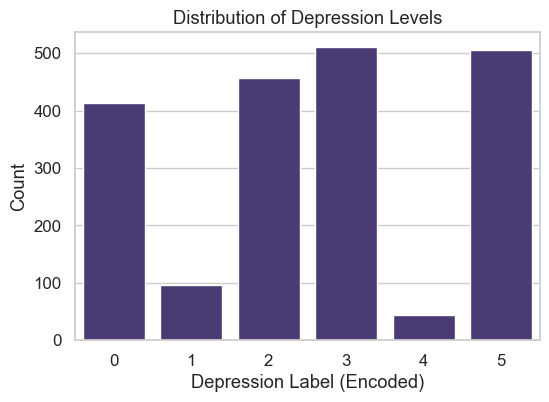

Depression_Label
3    0.251972
5    0.249014
2    0.225345
0    0.204142
1    0.047830
4    0.021696
Name: proportion, dtype: float64


In [4]:
target_col = "Depression_Label"

plt.figure(figsize=(6,4))
sns.countplot(x=target_col, data=df)
plt.title("Distribution of Depression Levels")
plt.xlabel("Depression Label (Encoded)")
plt.ylabel("Count")
plt.show()

print(df[target_col].value_counts(normalize=True))


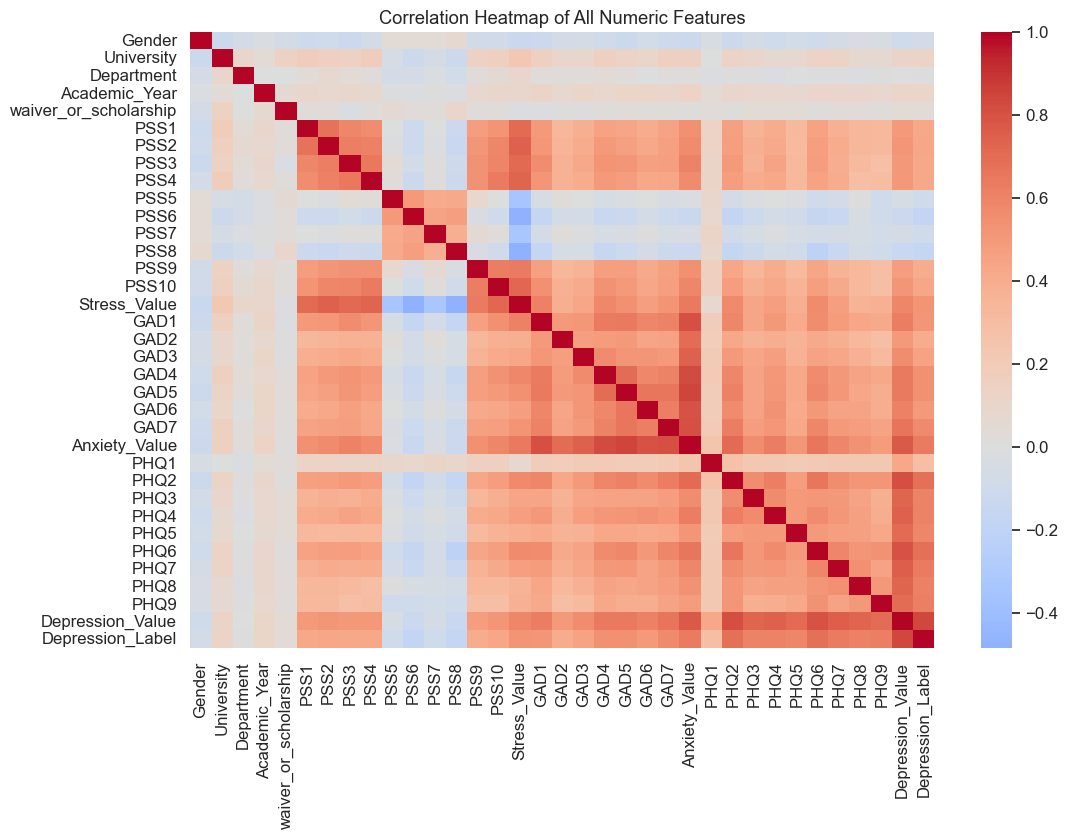

In [5]:
# Compute correlation (only for numeric columns)
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of All Numeric Features")
plt.show()


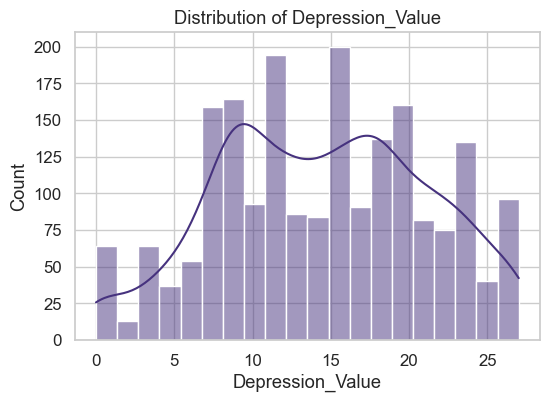

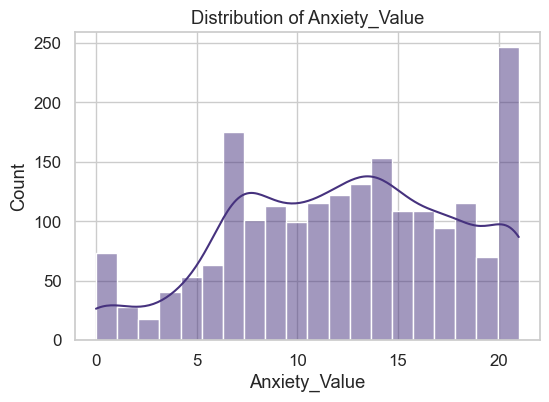

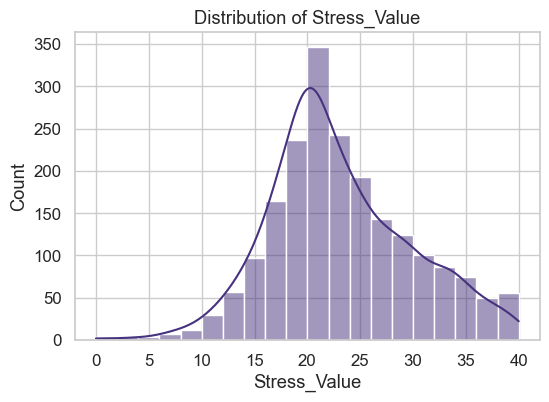

In [6]:
score_cols = ["Depression_Value", "Anxiety_Value", "Stress_Value"]

for col in score_cols:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        sns.histplot(df[col], kde=True, bins=20)
        plt.title(f"Distribution of {col}")
        plt.show()


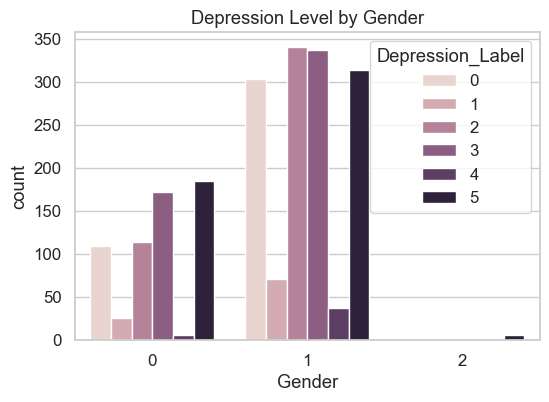

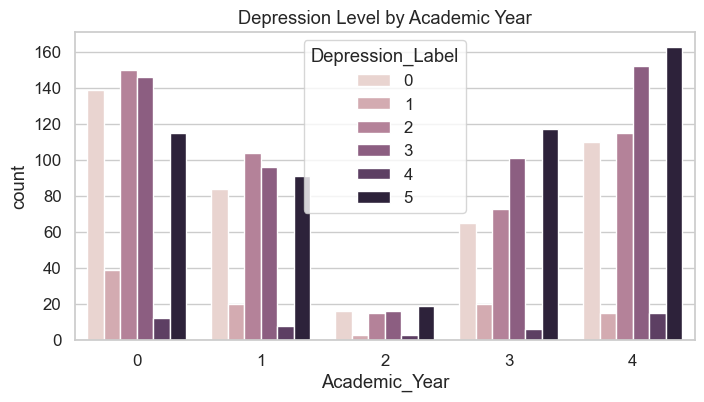

In [7]:
if "Gender" in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x="Gender", hue=target_col, data=df)
    plt.title("Depression Level by Gender")
    plt.show()

if "Academic_Year" in df.columns:
    plt.figure(figsize=(8,4))
    sns.countplot(x="Academic_Year", hue=target_col, data=df)
    plt.title("Depression Level by Academic Year")
    plt.show()


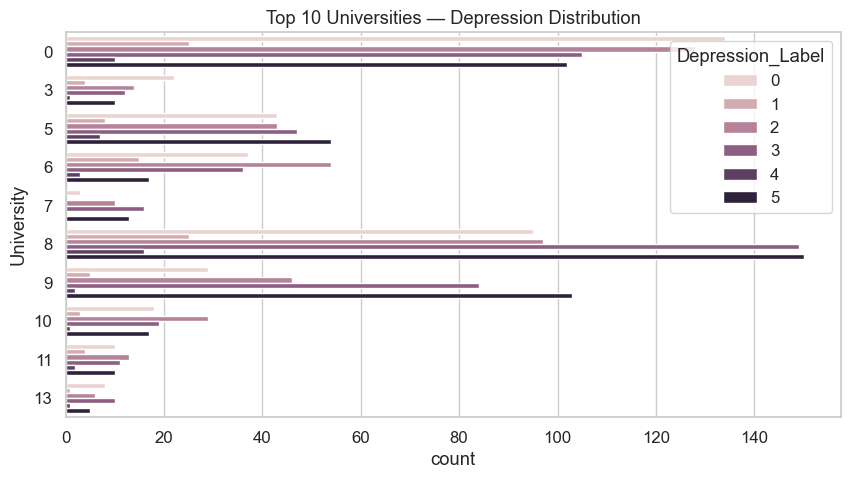

In [8]:
if "University" in df.columns:
    top_unis = df["University"].value_counts().head(10).index
    plt.figure(figsize=(10,5))
    sns.countplot(y="University", hue=target_col, data=df[df["University"].isin(top_unis)])
    plt.title("Top 10 Universities — Depression Distribution")
    plt.show()


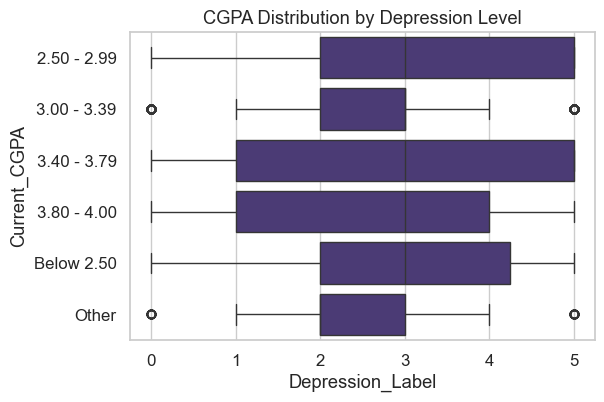

In [9]:
if "Current_CGPA" in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=target_col, y="Current_CGPA", data=df)
    plt.title("CGPA Distribution by Depression Level")
    plt.show()


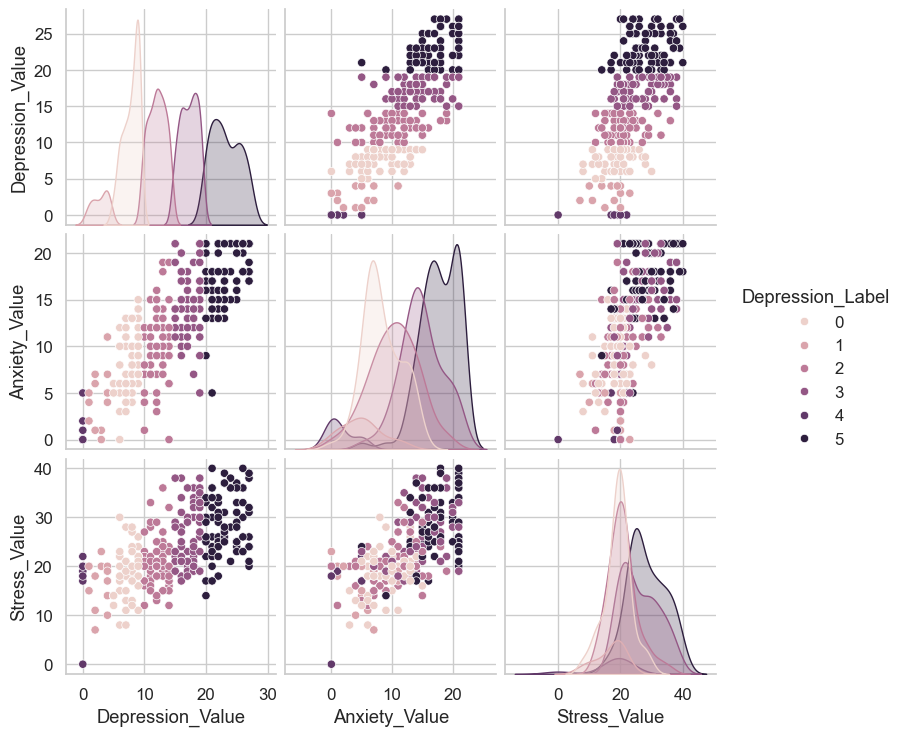

In [10]:
sample_df = df.sample(300, random_state=42)  # reduce for speed
cols_to_plot = ["Depression_Value", "Anxiety_Value", "Stress_Value", "Current_CGPA"]
sns.pairplot(sample_df[cols_to_plot + [target_col]], hue=target_col)
plt.show()


In [11]:
print("""
✅ EDA Summary:
1. Checked depression label balance.
2. Visualized distributions for PHQ (Depression), GAD (Anxiety), and PSS (Stress).
3. Explored correlations — confirm clinical & social linkages.
4. Observed patterns by gender, academic year, and CGPA.
Next step: feature selection & building baseline models.
""")



✅ EDA Summary:
1. Checked depression label balance.
2. Visualized distributions for PHQ (Depression), GAD (Anxiety), and PSS (Stress).
3. Explored correlations — confirm clinical & social linkages.
4. Observed patterns by gender, academic year, and CGPA.
Next step: feature selection & building baseline models.

